# **HW 2: Bank Marketing**
<hr>

<u>**Members**</u><br>
Tharnarch Thoranisttakul 63340500025<br>
Athimet Aiewcharoen 63340500068
<hr>

## **Functions and Necessary Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pandas_profiling as pp

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder , OneHotEncoder

# Fetures selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, StratifiedKFold, cross_val_score

# Neural network
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# Classification metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, precision_recall_curve
from sklearn import metrics

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## **Data Exploration**

From the description file, there are a total of 17 features in this dataset which are:

|Feature Name|Description|Data Type|
|:-:|-|:-:|
|<font color='green'>age</font>|Customer's age (in years)|<font color='red'>Numerical</font>|
|<font color='green'>job</font>|Types of Job|<font color='red'>Categorical</font>|
|<font color='green'>marital</font>|Marital Status|<font color='red'>Categorical</font>|
|<font color='green'>education</font>|Education|<font color='red'>Categorical</font>|
|<font color='green'>default</font>|Has credit in Default?|<font color='red'>Categorical</font>|
|<font color='green'>balance</font>|Average yearly balance|<font color='red'>Numerical</font>|
|<font color='green'>housing</font>|Has housing loan?|<font color='red'>Categorical</font>|
|<font color='green'>loan</font>|Has personal loan?|<font color='red'>Categorical</font>|
|<font color='green'>contact</font>|Contact Communication Type|<font color='red'>Categorical</font>|
|<font color='green'>day</font>|Last contact day of the month|<font color='red'>Numerical</font>|
|<font color='green'>month</font>|Last contact month of the year|<font color='red'>Categorical</font>|
|<font color='green'>duration</font>|Last contact duration (in seconds).<br><br> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|<font color='red'>Numerical</font>|
|<font color='green'>campaign</font>|no. of contacts performed during this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>pdays</font>|no. of days that passed by after the client was last contacted from a previous campaign|<font color='red'>Numerical</font>|
|<font color='green'>previous</font>|no. of contacts performed before this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>poutcome</font>|outcome of the previous marketing campaign|<font color='red'>Categorical</font>|
|<font color='green'>y</font>|has the client subscribed a term deposit?|<font color='red'>Categorical</font> [Output]|

Number of instances: 45211 for bank-full.csv <br>
Number of Attributes: 16 + output attribute (17)<br>
(45211 rows, 17 columns)

Missing Attribute Values: None

### **Import Dataset**

In [2]:
dfOri = pd.read_csv('../HWdata/bank/bank-full.csv', sep=';')
df = dfOri.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

We can see that this dataset has 45211 instances and 17 features.

### **Check and Remove Duplicates**

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


After dropping the unnecessary features, we are left with 16 features including output (y).

In which, there are:

- 10 features, including output, that are '<font color='green'>object</font>', which means that they are '<font color='red'>Categorical Features</font>'.
- 7 features that are '<font color='green'>int64</font>', which means that they are '<font color='red'>Numerical Features</font>'

### **Sort Features**
**Order:**
1. Numerical Features
2. Categorical Features
3. Output

**Separate Numerical Features from Dataset**

In [7]:
dfNum = df.select_dtypes(include=['int64'])

**Separate Categorical Features from Dataset**

In [8]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,:-1]

**Separate Output from Dataset**

In [9]:
dfOut = df.iloc[:,len(df.columns)-1:len(df.columns)]

**Concatenate Separated Data**

In [10]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   balance    45211 non-null  int64 
 2   day        45211 non-null  int64 
 3   duration   45211 non-null  int64 
 4   campaign   45211 non-null  int64 
 5   pdays      45211 non-null  int64 
 6   previous   45211 non-null  int64 
 7   job        45211 non-null  object
 8   marital    45211 non-null  object
 9   education  45211 non-null  object
 10  default    45211 non-null  object
 11  housing    45211 non-null  object
 12  loan       45211 non-null  object
 13  contact    45211 non-null  object
 14  month      45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 6.2+ MB


### **Overall Report**

In [12]:
profile = pp.ProfileReport(df, title="Bank Full Report")
# profile.to_file('HW2OverallReport.html')
# profile.to_notebook_iframe()

#### **Plot Features of Separated Output**

In [13]:
dfyes = df[df['y'] == 1]
dfno = df[df['y'] == 0]

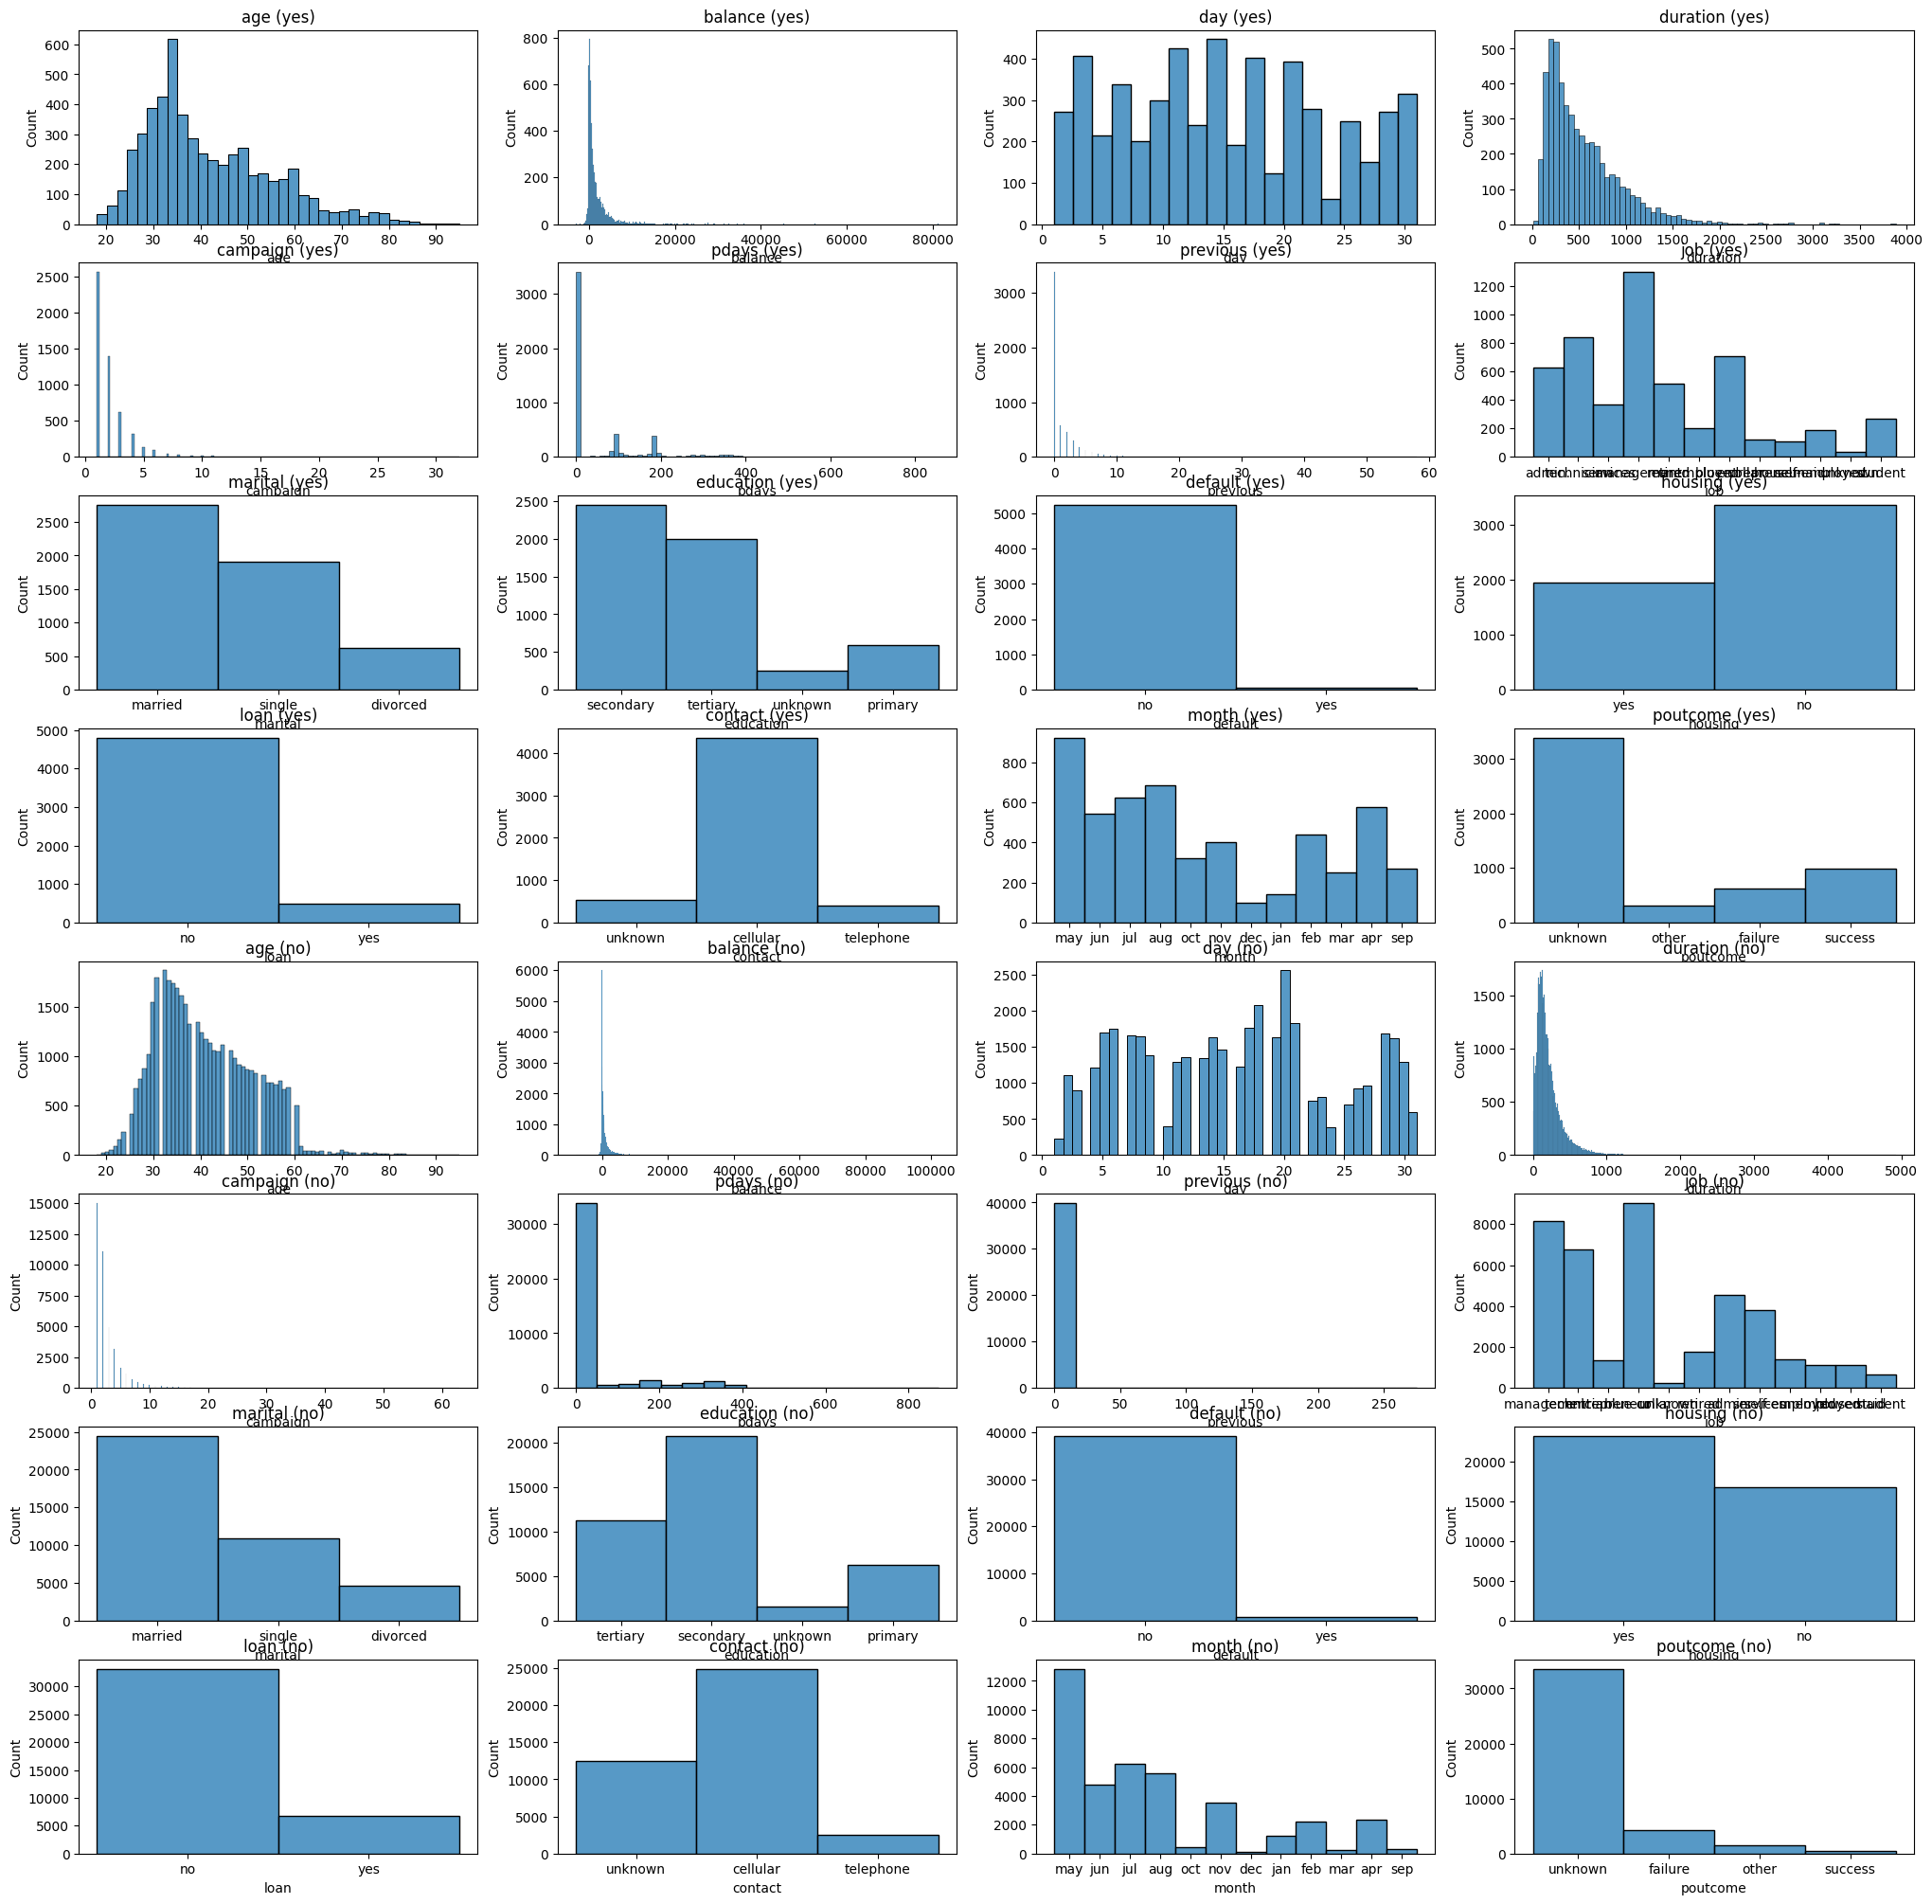

In [14]:
plt.figure(figsize=(25,25))
for idx, col in enumerate(dfyes.columns):
    if col != 'y':
        plt.subplot(8, 4, idx+1)
        sns.histplot(dfyes[col], kde=False)
        plt.title(col + ' (yes)')
for idx, col in enumerate(dfno.columns):
    if col != 'y':
        plt.subplot(8, 4, idx+len(dfno.columns))
        sns.histplot(dfno[col], kde=False)
        plt.title(col + ' (no)')

From here, we will be taking some features that are noticeably different when plotting against output to re-plot it for better visualization.

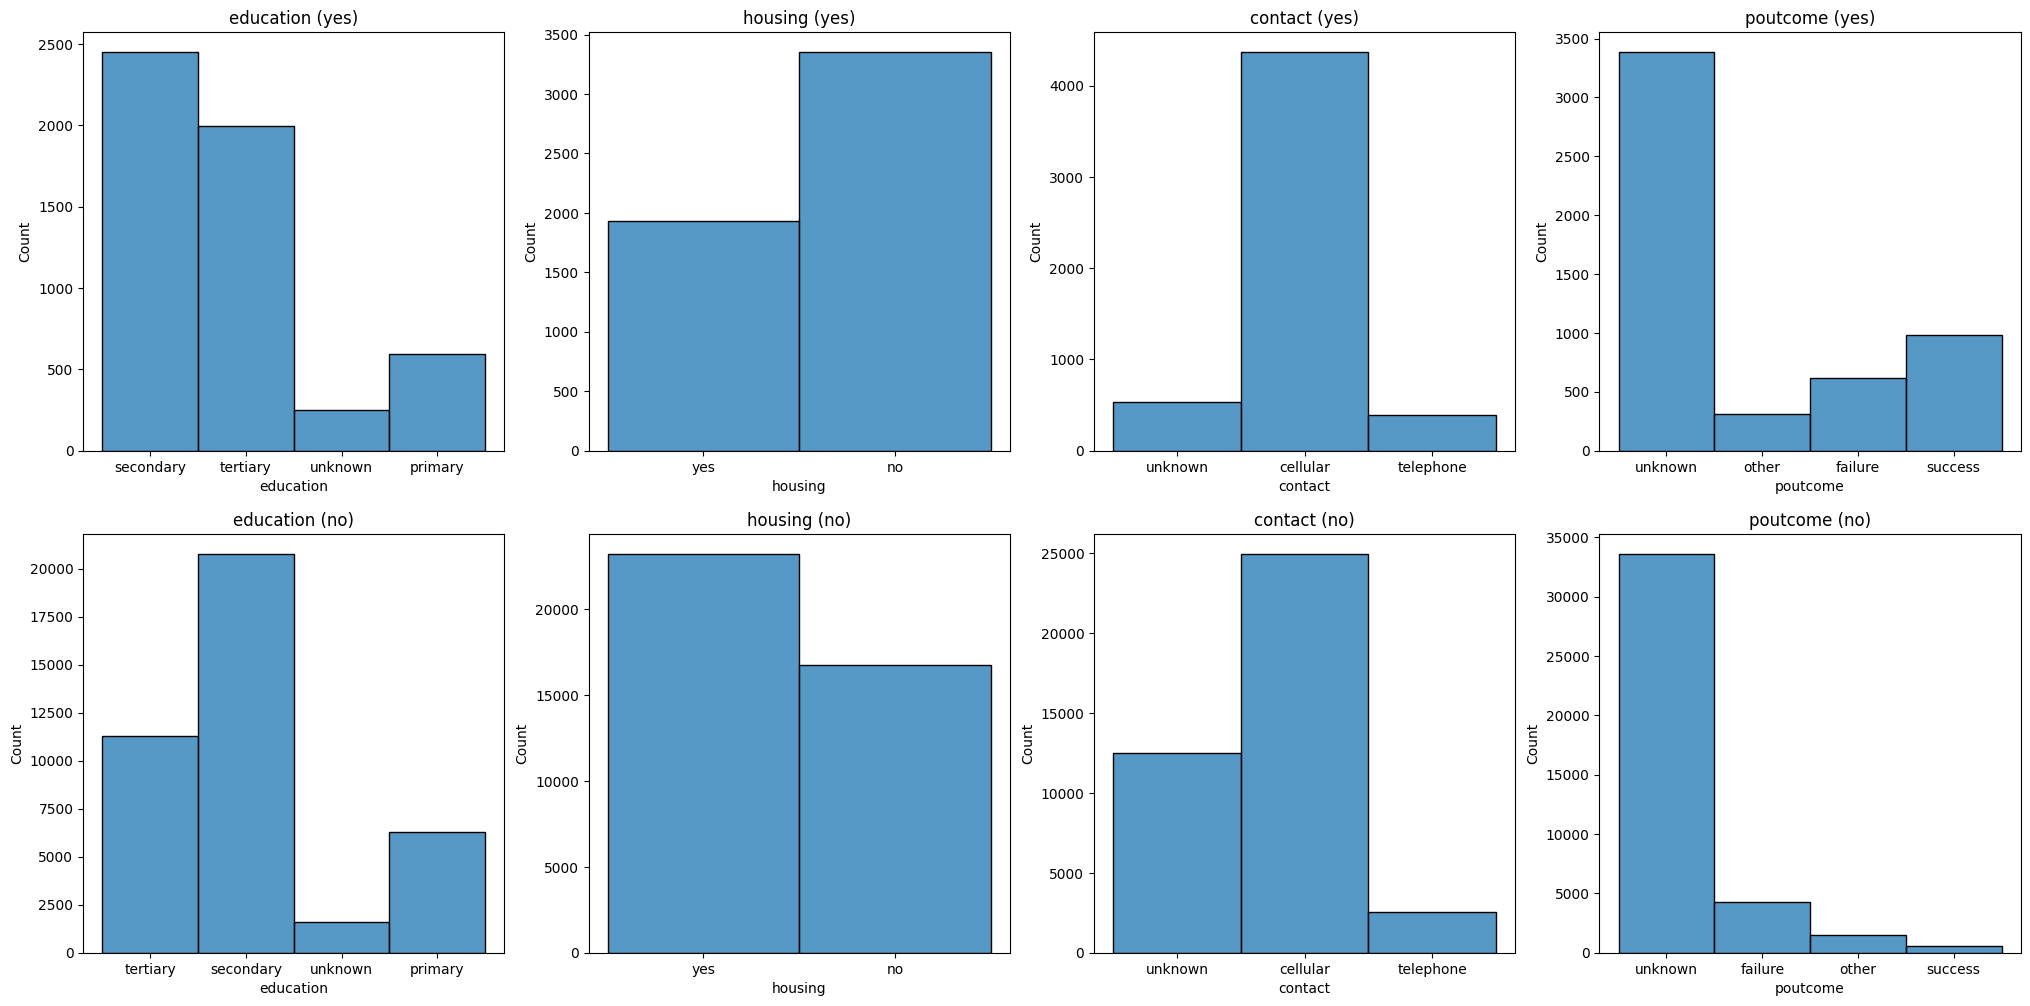

In [15]:
colToPlot = ['education', 'housing', 'contact', 'poutcome']
plt.figure(figsize=(25,25))
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1)
    sns.histplot(dfyes[col], kde=False)
    plt.title(col + ' (yes)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+len(colToPlot)+1)
    sns.histplot(dfno[col], kde=False)
    plt.title(col + ' (no)')

#### **Pairplotting Data Samples**

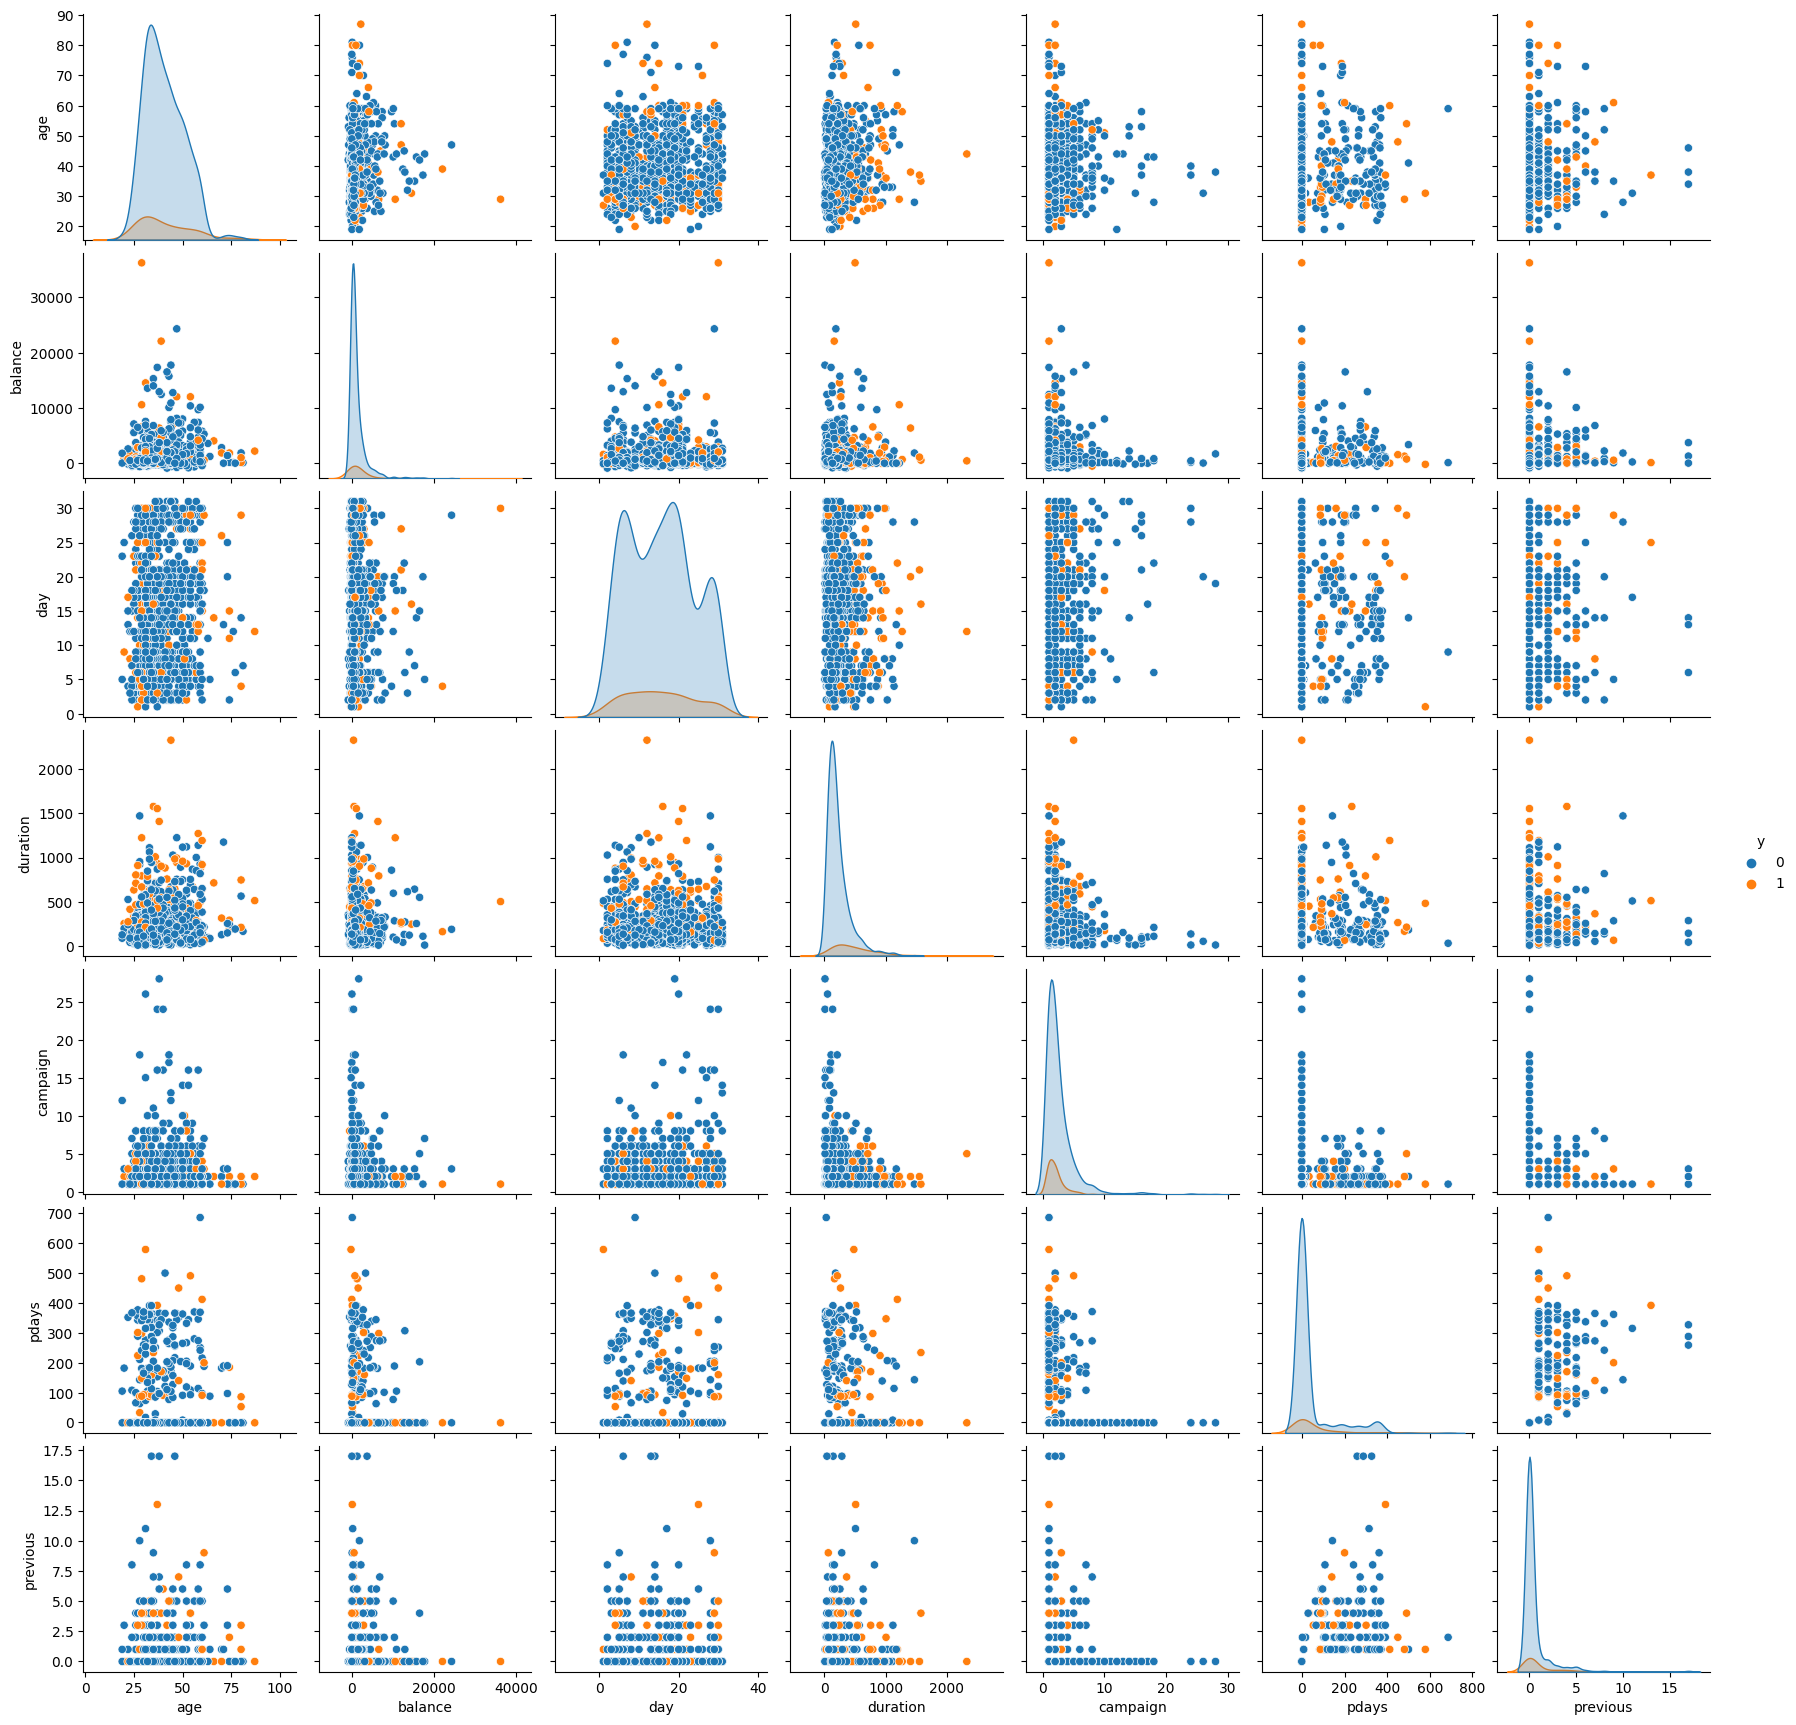

In [16]:
sns.pairplot(df.sample(1000, random_state=999), diag_kind="kde", hue='y')

#### **Data Exploration's Conclusion**

From the overall report,

Plotting Histogram of Numerical Features:

|Feature Names|Distribution|
|-|-|
|age|Right-skewed|
|balance|Right-skewed|
|day|Uniform|
|duration|Right-skewed|
|campaign|Right-skewed|
|pdays|Right-skewed|
|previous|Right-skewed|

Plotting Values Count of Categorical Features:

|Feature Names|What we got|
|-|-|
|job|Most common jobs are 'blue-collar', 'management' and 'technician' (59.2% in total).|
|marital|60.2% of this data are 'Married', 28.3% are 'Single' and the rest are 'Divorced'|
|education|Mostly 'secondary' (51.3%) followed by 'tertiary' (29.4%), 'primary' (15.2%) and 'unknown' (4.1%)|
|default|Mostly 'false' (98.2%)|
|housing|55.6% are 'true' and the rest are 'false'|
|loan|Mostly 'false' (84%)|
|contact|Mostly 'cellular' (64.8%) followed by 'unknown' (28.8%) and 'telephone' (6.4%)|
|month|Mostly 'may' (30.4%)|
|poutcome|Mostly 'unknown' (81.7%) followed by 'failure' (10.8%), 'other' (4.1%) and 'success' (3.3%)|

Good and Bad things of this dataset:

|Good Things|Explanation|
|-|-|
|Filled Data in Numerical Features|There are no missing data (NaN) or unknown in numerical features of this dataset.|
|Output data|In some features, 'yes' and 'no' data are noticeably different, as shown in the above figure.|

<hr>

|Bad Things|Explanation|
|-|-|
|Data Explanation|Most features come with little to no explanation or bad explanation.|
|Data Distribution|There are no normal distributed data. Almost all of them are right-skewed.|
|Correlation|There are a lot of high correlation between features.|
|'poutcome' Features|This feature's data are mostly 'unknown' (around 81.7%).|
|Unknown Data|Unclear explanation of what unknown data means and there are a lot of them in categorical features.|
|Data Variation|As we can see when pairplotting, variance between features are quite low and variance within class are quite high, which means that data variation is very bad.|

**NOTE**: For all 'Unknown' data in categorical features, we assumed 'Unknown' as a type of data because there are quite a lot of 'Unknown' data.

Furthermore, because we are dealing with a dataset from bank, those 'Unknown' data might be undisclosed information of the customers.

## **Benchmarking** (before data preprocessing)

### **Decision Tree Classifier**

In [32]:
#get the dummy variables for the categorical 
dfDT = dfOri.copy()
dfDT = pd.get_dummies(dfDT, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xDT = dfDT.drop(['y'], axis = 1)
yDT = dfDT['y']

xDT_train, xDT_test, yDT_train, yDT_test = train_test_split(xDT, yDT, test_size = 0.2, random_state = 0)

DT_clf = DecisionTreeClassifier()
DT_clf.fit(xDT_train,yDT_train)
print('Train score: ', DT_clf.score(xDT_train, yDT_train))
print('Test score: ', DT_clf.score(xDT_test, yDT_test))

Train score:  1.0
Test score:  0.8705075749198274


#### **Predict using Train Data**

In [33]:
yDT_pred_train = DT_clf.predict(xDT_train)

print("Classification report on Train data\n=======================")
print(classification_report(y_true=yDT_train, y_pred=yDT_pred_train))

print("Confusion matrix on Train data\n=======================")
print(confusion_matrix(y_true=yDT_train, y_pred=yDT_pred_train))

Classification report on Train data
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     31942
         yes       1.00      1.00      1.00      4226

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168

Confusion matrix on Train data
[[31942     0]
 [    0  4226]]


#### **Predict using Test Data**

In [34]:
yDT_pred_test = DT_clf.predict(xDT_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yDT_test, y_pred=yDT_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yDT_test, y_pred=yDT_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

          no       0.93      0.92      0.93      7980
         yes       0.45      0.46      0.46      1063

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043

Confusion matrix on Test data
[[7379  601]
 [ 570  493]]


### **Multi-Layer Perceptron Classifier**

In [41]:
#get the dummy variables for the categorical 
dfMLP = dfOri.copy()
dfMLP = pd.get_dummies(dfMLP, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xMLP = dfMLP.drop(['y'], axis = 1)
yMLP = dfMLP['y']

xMLP_train, xMLP_test, yMLP_train, yMLP_test = train_test_split(xMLP, yMLP, test_size = 0.2, random_state = 0)

MLP_clf = MLPClassifier()
MLP_clf.fit(xMLP_train,yMLP_train)
print('Train score: ', MLP_clf.score(xMLP_train, yMLP_train))
print('Test score: ', MLP_clf.score(xMLP_test, yMLP_test))

Train score:  0.8993032514930325
Test score:  0.8922923808470641


#### **Predict using Train Data**

In [42]:
yMLP_pred_train = MLP_clf.predict(xMLP_train)

print("Classification report on Train data\n=======================")
print(classification_report(y_true=yMLP_train, y_pred=yMLP_pred_train))

print("Confusion matrix on Train data\n=======================")
print(confusion_matrix(y_true=yMLP_train, y_pred=yMLP_pred_train))

Classification report on Train data
              precision    recall  f1-score   support

          no       0.93      0.96      0.94     31942
         yes       0.59      0.44      0.50      4226

    accuracy                           0.90     36168
   macro avg       0.76      0.70      0.72     36168
weighted avg       0.89      0.90      0.89     36168

Confusion matrix on Train data
[[30676  1266]
 [ 2376  1850]]


#### **Predict using Test Data**

In [43]:
yMLP_pred_test = MLP_clf.predict(xMLP_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yMLP_test, y_pred=yMLP_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yMLP_test, y_pred=yMLP_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

          no       0.93      0.95      0.94      7980
         yes       0.55      0.44      0.49      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.70      0.71      9043
weighted avg       0.88      0.89      0.89      9043

Confusion matrix on Test data
[[7603  377]
 [ 597  466]]


# Pipeline test

In [20]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None,**transform_params):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None, **fit_params):
        return self 


In [21]:
class betterLabelEncoder():
    def __init__(self, toEncode:list, columnToEncode:list):
        self.toEncode = toEncode
        self.columnToEncode = columnToEncode
        
    def transform(self,X,y=None,**transform_params):
        for toEn, colToEn in zip(self.toEncode, self.columnToEncode):
            X[colToEn] = X[colToEn].apply(lambda x: toEn.index(x))
        return X
    
    def fit(self, X, y=None, **fit_params):
        return self

In [22]:
toEncode = [["single","married","divorced"], ["unknown","primary","secondary","tertiary"]]
columnToEncode = ['marital', 'education']

LE_pipeline = Pipeline([
    ("LabelEncoder", betterLabelEncoder(toEncode, columnToEncode))
])

In [23]:
drop_features = ['duration']
# drop_transformer = ColumnTransformer(transformers=['drop_columns', 'drop', drop_features], remainder='passthrough')
drop_pipeline = Pipeline([
    ("columnDropper", columnDropperTransformer(drop_features))
])

In [24]:
dfpipe = dfOri.copy()

numeric_features = dfpipe.select_dtypes(include=['int64', 'float64']).columns.drop('duration')

categorical_features = dfpipe.select_dtypes(include=['object']).drop(['y'], axis=1).columns

numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant')),
      ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

pipeline_tree = Pipeline(steps = [
            ('drop', drop_pipeline),
            ('preprocessor', preprocessor),
            ('regressor',DecisionTreeClassifier())
           ])


In [25]:
x = dfpipe.drop(['y'], axis = 1)
y = dfpipe['y']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

clf_tree = pipeline_tree.fit(x_train, y_train)

# clf = DecisionTreeClassifier()
# clf.fit(clf_tree.transform(x_train), y_train)
y_pred = clf_tree.predict(x_test)

print("Classification report on Train data\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix on Train data\n=======================")

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report on Train data
              precision    recall  f1-score   support

          no       0.91      0.89      0.90      7980
         yes       0.31      0.35      0.33      1063

    accuracy                           0.83      9043
   macro avg       0.61      0.62      0.62      9043
weighted avg       0.84      0.83      0.84      9043

Confusion matrix on Train data
[[7140  840]
 [ 691  372]]


In [26]:
clf_tree

Pipeline(steps=[('drop',
                 Pipeline(steps=[('columnDropper',
                                  <__main__.columnDropperTransformer object at 0x000001E2E5FE9C40>)])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('regressor', DecisionTreeClassifier())])

In [27]:
# check unknown values
dfOri.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64